> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# III: Logistic Regression

<div style="text-align: right"> **Due date: Nov. 2, 2019.** </div> 
<div style="text-align: right"> **Please upload your file @ yscec by 8PM in the form of [ID_Name.zip].** </div> 
<div style="text-align: right"> Wonkyung Lee (이원경): <a href="mailto:leewk92@yonsei.ac.kr">leewk92@yonsei.ac.kr</a> </div>
<div style="text-align: right"> Geon Lee (이건): <a href="mailto:2015142195@yonsei.ac.kr"> 2015142195@yonsei.ac.kr</a> </div>

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code for the programming part (**if not you will get a F grade**).

<h2><span style="color:blue">[2015142113] [JunYoung Kim]</span> </h2>

In [1]:
%load_ext autoreload
%autoreload 2

import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2019-11-01 15:03:45.529051


## Problem description

We will implement $Stochastic Gradient Descent (SGD)$ to optimize a logistic regression model to predict whether a given patient have diabetes or not. In clinical informatics, machine learning approahces have been widely adopted to predict clinically adverse events based on patient data. For this problem, we will use the Pima Indians Diabetes Data Set. The data on each patient include:

- $\texttt{label}$: The output class variable (0 - normal or 1 - diabetes)  
- $\texttt{num_preg}$: Number of times pregnant 
- $\texttt{PGC}$: Plasma glucose concentration at 2 hours in an oral glucose tolerance test (PGC)
- $\texttt{DBP}$: Diastolic blood pressure (DBP)
- $\texttt{tricept}$: Triceps skin fold thickness (tricept, unit: mm)  
- $\texttt{insulin}$: 2-Hour serum insulin (insulin, unit: μU/ml)
- $\texttt{BMI}$: Body mass index (BMI)
- $\texttt{ped_func}$: Diabetes pedigree function
- $\texttt{age}$: Age (age, years)

Among all 768 patients, we will separate 500 patients as training data ($\texttt{logistic_regression_training_data.csv}$) and 268 patients as test data ($\texttt{logistic_regression_test_data.csv}$).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from P03 import load_data

In [4]:
train_csv_path = 'logistic_regression_training_data.csv'
test_csv_path = 'logistic_regression_testing_data.csv'
df_train = pd.read_csv(train_csv_path)
df_test = pd.read_csv(test_csv_path)

In [5]:
df_train.head()

,label,num_preg,PGC,DBP,tricept,insulin,BMI,ped_func,age
0,1,0.470588,0.758794,0.639344,0.507937,0.35,0.639344,0.187020,0.250000
1,1,0.235294,0.663317,0.000000,0.000000,0.00,0.490313,0.095645,0.033333
2,0,0.058824,0.467337,0.459016,0.174603,0.00,0.335320,0.144748,0.016667
3,0,0.058824,0.547739,0.311475,0.285714,0.20,0.344262,0.140478,0.083333
4,1,0.176471,0.869347,0.688525,0.523810,0.79,0.532042,0.076857,0.016667


In [6]:
X_train, y_train, features = load_data(df_train)
X_test, y_test, _ = load_data(df_test)

X = {'train': X_train, 'test': X_test}
y = {'train': y_train, 'test': y_test}

In [7]:
features

Index(['num_preg', 'PGC', 'DBP', 'tricept', 'insulin', 'BMI', 'ped_func',
       'age'],
      dtype='object')

### I. Logistic regression method using SGD




### P1.1   
(*40 points*) P1.1 Implement a logistic regression method using SGD. You may assume that the data is randomly ordered. 

In [8]:
from P03 import LogisticRegressionSGD

In [9]:
iterations = 100000
lr = 0.8
number_of_ensemble = 1000

In [10]:
logistic_regression = LogisticRegressionSGD(lr, iterations, number_of_ensemble)
w = logistic_regression.fit(X, y)

In [11]:
print(w)

[  4.47115018  12.05188976  -0.81097969  -0.63289615  -1.00704401
   7.18833854   2.7908209    1.4022448  -11.63873807]


### P1.2

(*10 points*) P1.2 Plot $\bar L$ every 100 iterations, e.g., [100, 200, 300,...], defined as

$\begin{equation} \bar L(T) = \frac{1}{T}\sum_{t=1}^{T} (\hat y^t - y^t)^2 \end{equation}$,   
where $T$ is the number of iterations and $\hat y^t$ (either 0 or 1) is the predicted label for sample $\bf{x}^t$ using the weights $\bf{w}^{t-1}$. 

> Initialize the weight vector $w$ and the bias $w_0$ to 0.    
> Learning rate = 0.8.    
> Number of iterations = 100,000.


Text(0, 0.5, 'Average loss')

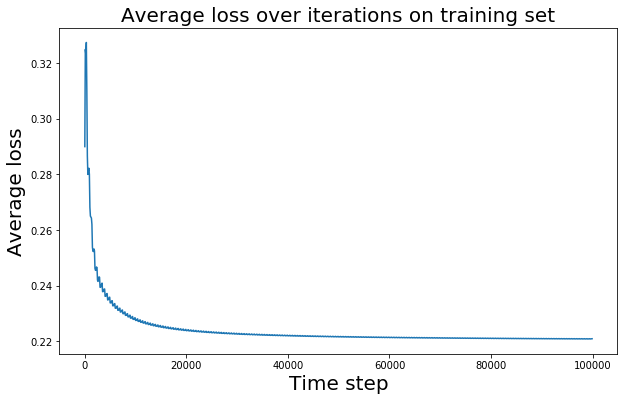

In [12]:
# plot average loss L over the number of steps T
fig = plt.figure(figsize=(10,6))
plt.plot(np.arange(len(logistic_regression.avg_loss_over_itr)) * 100, 
         logistic_regression.avg_loss_over_itr)
plt.title('Average loss over iterations on training set', fontsize=20)
plt.xlabel('Time step', fontsize=20)
plt.ylabel('Average loss', fontsize=20)

### P1.3

(*10 points*) P1.3 Use the model weights to predict whether each patient in the test set has diabetes, for every 100 steps. Plot average of squared errors of your prediction.

<center>$\begin{equation} TestError = \frac{1}{N_{test}}\sum_{i=1}^{N_{test}} (\hat y^i - y^i)^2 \end{equation}$</center>

Text(0, 0.5, 'Squared error')

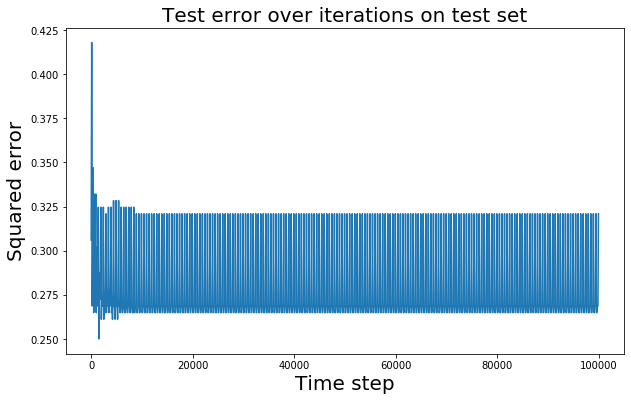

In [13]:
# plot sum of squared error over iterations
plt.figure(figsize=(10,6))
plt.plot(np.arange(len(logistic_regression.test_error_over_itr)) * 100, 
         logistic_regression.test_error_over_itr)
plt.title('Test error over iterations on test set', fontsize=20)
plt.xlabel('Time step', fontsize=20)
plt.ylabel('Squared error', fontsize=20)

### II. Model evaluation and feature interpretations 


### P2.1   
(*10 points*) P2.1 Using the model after 100,000 iterations, measure test accuracy. Accuracy is the fraction of predictions our model got right. That is, it is computed by Number of correct predictions / Total number of predictions.

In [14]:
accuracy = logistic_regression.get_accuracy(X['test'], y['test'], w)
print(accuracy)

0.6791044776119403


### P2.2

(*5 points*) P2.2 SGD oscillates around a solution (noisy convergence). In order to minimize risk of picking bad weights, we typically use an average model. Measure test accuracy again, using an average model over the weights for the last 1000 iterations


In [15]:
logistic_regression.w_ensemble

array([  3.98788775,  11.74163817,  -1.17313448,  -0.03423808,
        -0.92481426,   7.30162095,   2.57262878,   0.41453668,
       -12.30863863])

In [16]:
accuracy_ensemble = logistic_regression.get_accuracy(
    X['test'], y['test'], logistic_regression.w_ensemble)
print(accuracy_ensemble)

0.7276119402985075


### P2.3


(*5 points*) P2.3 Report the weights of following features, $\texttt{BMI}$, $\texttt{insulin}$, and $\texttt{PGC}$

In [17]:
from P03 import get_indices_of_fields

In [18]:
fields = np.array(['BMI', 'insulin', 'PGC'])
indices = get_indices_of_fields(fields, features)

In [19]:
logistic_regression.w_ensemble[indices]

array([ 7.30162095, -0.92481426, 11.74163817])


# Result Analysis and Discussion (20 points)



For result analysis and discussion, you can use all functions defined above. Also you can make your own functions or scripts.

Your answer must include the analysis about:

- Difference between Stochastic Gradient Descent and Batch Gradient Descent.
- Influence of each feature in classifying diabetes.
- Effect of applying the ensemble technique.

- Difference between Stochastic Gradient Descent and Batch Gradient Descent.

Batch Gradient Descent(BGD)는 모든 데이터 sample에 대해 gradient를 구한 후, 그 gradient들의 합에 해당하는 최종 gradient의 반대 방향으로 계속해서 이동해 최소값을 찾는 방법이다. 이 방법은 현재의 위치에서 최소값으로 가는 최적의 방향을 찾아서 이동한다는 장점이 있지만, 계산량이 총 데이터 sample 수 N의 값에 영향을 받기 때문에, N의 값이 커지면 계산 시간이 오래 걸린다는 단점이 있다. 이와 달리 Stochastic Gradient Descent(SGD)는 모든 데이터 sample이 아닌 임의의 하나의 sample에 대해 gradient를 구해, 그 gradient의 반대 방향으로 이동해 나가는 방법이다. 즉, 어떠한 하나의 sample의 gradient가 전체의 gradient를 대변한다고 가정하는 방법이다. 이 방법은 임의의 방향으로 이동하기 때문에 Descent를 원하는 경우, 가끔 Ascent하는 방향으로 이동할 수 있지만, 대부분의 방향이 Descent하는 방향임을 이용해 평균적으로는 최솟값의 방향으로 진전해 나가는 특징을 이용하였다. 임의의 하나의 sample만 사용하기 때문에 SGD는 계산량이 N값에 영향을 받지 않아 Large N을 갖는 데이터들의 최적화 방식에 주로 사용된다. 하지만, SGD는 Noisy한 Convergence 결과를 갖게 되므로 대부분 iteration 끝부분의 몇개의 Coefficient w값들을 선택해 그들의 평균으로 w값을 이용하여 잘못된 pick으로 인한 error 효과를 줄인다. 위에서도 w값이 아닌 w_ensemble 값을 최종 Model의 Coefficient값으로 사용하는 것을 볼 수 있다.


- Influence of each feature in classifying diabetes.

P2-2에서 확인 할 수 있는 w_ensemble값을 보면, 총 8가지의 feature 중 PGC의 값이 약 11.74의 weight로 가장 Diabetes로 분류되는데에 큰 역할을 하는 것을 알 수 있다. 그 다음은 BMI가 약 7.3의 weight로 비교적 큰 영향을 미치는 것을 알 수 있다. num_preg, ped_func, age도 값이 클 수록 Diabetes로 판명날 확률을 높게 만든다. DBP, tricept, insulin들은 음의 weight값을 가지는 걸 보아 Diabetes가 아닌 것으로 분류되는 것에 힘을 실어주는 것을 알 수 있다. 하지만 tricept같은 경우는 그 weight 절댓값이 매우 작은 것을 보아, Diabete와 큰 연관이 없을 확률이 있다. Intercept의 weight같은 경우 약 -12.3의 값을 갖는다. 이는 feature들과 각 weight들로 Score를 구했을 때, 그 값이 -12.3보다 크면 Diabete일 확률이 50%이상이 되어 Diabete로 분류되게 된다는 의미를 갖는다.

- Effect of applying the ensemble technique

첫번째 항목에서도 말했다시피, SGD방법은 최솟값으로의 최적의 방향을 찾아 이동하는 것이 아니기 때문에, Noisy한 Convergence 결과를 가지게 된다. P1-3의 Test error over iterations 그래프를 보면, 100번의 step마다 그 때의 w값을 가지고 test error를 측정한 결과를 볼 수 있는데, test error가 어느 순간부터 줄지 않고 계속 비슷한 크기로 Noisy하게 흔들리는 것을 알 수 있다. 100000번의 iteration 중, 99890번째의 w를 사용했을 때는 작은 error값이 나왔는데, 99900번째의 w를 사용했을 때는 큰 error값이 나올 수 있다는 것이다. 따라서, 잘못된 iteration 횟수의 선택으로 큰 test error값을 가지게 되는 risk를 줄이기 위해, Convergence 부분의 여러개의 w 값들을 평균내, w_ensemble 값을 w로서 사용한다. 이렇게 w_ensemble을 사용하면, 그냥 최종 w를 사용했을 때에 비해 P2-1과 P2-2에서 보다시피 Model의 Accuracy가 약 0.6791에서 0.7276로 0.0485정도 증가되는 효과를 가져올 수 있다.